<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Importing libraries
</h2>

In [2]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("../processed/cleaned_flight_data.csv")
df

,Total_Stops,Price,Dep_time,Arrival_time,Duration,Day_of_week,Month_sin,Month_cos,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,1340,70,170,6,1.000000e+00,6.123234e-17,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,350,795,445,2,5.000000e-01,-8.660254e-01,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,565,265,1140,6,1.224647e-16,-1.000000e+00,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,1085,1410,325,6,5.000000e-01,-8.660254e-01,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1010,1295,285,4,1.000000e+00,6.123234e-17,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,0,4107,1195,1345,150,1,8.660254e-01,-5.000000e-01,0,0,...,0,0,0,1,0,0,0,0,0,0
10289,0,4145,1245,1400,155,5,8.660254e-01,-5.000000e-01,1,0,...,0,0,0,1,0,0,0,0,0,0
10290,0,7229,500,680,180,5,8.660254e-01,-5.000000e-01,0,0,...,0,0,0,0,0,0,1,0,0,0
10291,0,12648,690,850,160,4,1.000000e+00,6.123234e-17,0,0,...,0,0,0,0,0,0,0,0,0,1


<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Spliting Data
</h2>

In [4]:
x=df.drop('Price',axis=1)
y=df['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Scaling
</h2>

In [5]:
numeric_cols = ['Dep_time', 'Arrival_time', 'Duration', 'Month_sin', 'Month_cos']
other_cols = [col for col in x.columns if col not in numeric_cols]


scaler = ColumnTransformer([
    ('scale_numeric', RobustScaler(), numeric_cols),
    ('keep_others', 'passthrough', other_cols)
])

<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
  Elbow Method 
</h2>

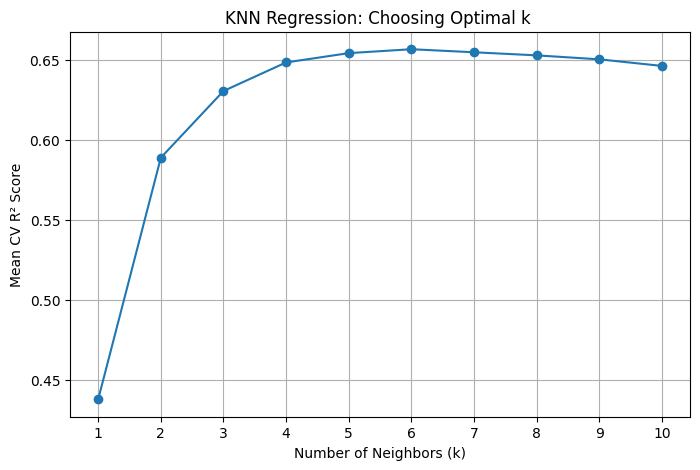

In [6]:
k_range = range(1, 11)
cv_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
    
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("KNN Regression: Choosing Optimal k ")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV R² Score")
plt.xticks(k_range)
plt.grid(True)
plt.show()

<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
Hyperparameter Tuning
</h2>

In [7]:
param_grid = {
    "Linear Regression": {
        "pipeline": Pipeline([
            ("scaler",scaler),
            ("model", LinearRegression())
        ]),
        "param": {}
    },
    "Decision Tree": {
        "pipeline": Pipeline([
             ("scaler","passthrough"),
            ("model", DecisionTreeRegressor())
        ]),
        "param": {
            "model__criterion": ["squared_error", "friedman_mse", "absolute_error"],
            "model__max_depth": [None, 3, 5, 7, 10]
        }
    },
    "Random Forest": {
        "pipeline": Pipeline([
            ("scaler","passthrough"),
            ("model", RandomForestRegressor())
        ]),
        "param": {
            "model__criterion": ["squared_error", "absolute_error"],
            "model__max_depth": [None, 3, 5, 7, 10],
            "model__max_features": ["sqrt", "log2"],
            "model__n_estimators": [100, 200]
        }
    },
    "SVR": {
        "pipeline": Pipeline([
             ("scaler",scaler),
            ("model", SVR())
        ]),
        "param": {
            "model__C": [0.01, 0.1, 1, 10],
            "model__kernel": ["linear", "rbf"],
            "model__gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "pipeline": Pipeline([
             ("scaler",scaler),
            ("model", KNeighborsRegressor())
        ]),
        "param": {
            "model__n_neighbors": [2, 3, 6, 10]
        }
    },
    
     "XGBoost":{
        "pipeline":Pipeline([
            ("scaler",scaler),
            ("model",XGBRegressor())]),
        "param":{
            "model__learning_rate":[0.01,0.1,1],
            "model__max_depth":[3,5,7],
            "model__n_estimators":[100,200]
        }
    },
     
    "Voting": {
        "pipeline": Pipeline([
            ("model", VotingRegressor(
                estimators=[
                    ("Linear Regression", LinearRegression()),
                    ("Decision Tree", DecisionTreeRegressor()),
                    ("Random Forest", RandomForestRegressor()),
                    ("SVR", SVR()),
                    ("KNN", KNeighborsRegressor())
                ]
            ))
        ]),
        "param": {}   
    }
}


<h2 style="font-family: Poppins, sans-serif; font-size: 1.6rem; font-weight:600; color:rgba(150, 255, 255, 0.6); text-shadow: 0 0 6px rgba(56,189,248,0.8), 0 0 12px rgba(56,189,248,0.6);">
Test Models
</h2>

In [9]:
import os
if not os.path.exists("models"):
    os.makedirs("models")

best_models = []

for name, mp in param_grid.items():
    grid = GridSearchCV(mp['pipeline'], mp['param'], cv=5, n_jobs=-1, scoring='r2')  
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    joblib.dump(grid.best_estimator_, f"models/{name}_best.pkl")

    best_models.append({
        'Model': name,
        'BestParams': grid.best_params_,
        'R2_Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Best CV Score (R2)': grid.best_score_
    })

res_df = pd.DataFrame(best_models)
res_df

,Model,BestParams,R2_Score,MSE,MAE,Best CV Score (R2)
0,Linear Regression,{},0.630882,5.993556e+06,1801.700679,0.636270
1,Decision Tree,"{'model__criterion': 'squared_error', 'model__...",0.738994,4.238091e+06,1394.977551,0.709792
2,Random Forest,"{'model__criterion': 'squared_error', 'model__...",0.750731,4.047518e+06,1448.803753,0.739593
3,SVR,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.613337,6.278456e+06,1774.449133,0.603827
4,KNN,{'model__n_neighbors': 10},0.714104,4.642242e+06,1512.429432,0.710063
5,XGBoost,"{'model__learning_rate': 0.1, 'model__max_dept...",0.796080,3.311154e+06,1261.460205,0.783236
6,Voting,{},0.715745,4.615594e+06,1560.012781,0.701714
